In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import json
import requests
import geopandas
import panel as pn

In [28]:
df = pd.read_csv("final_data.csv")
df = df.rename(columns = {"nationality":"name"})
df.head()

,marital_status,application_mode,application_order,course,time,previous_qualification,name,mother's_qualification,father's_qualification,mother's_occupation,...,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,unemployment_rate,inflation_rate,gdp,output
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,Portugal,NaN,11th Year of Schooling - Not Completed,"Farmers and Skilled Workers in Agriculture, Fi...",...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,Portugal,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Administrative staff,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,Portugal,Technical-professional course,2nd cycle of the general high school course,Armed Forces Professions,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,Portugal,NaN,2nd cycle of the general high school course,"Farmers and Skilled Workers in Agriculture, Fi...",...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,Portugal,Technical-professional course,NaN,Armed Forces Professions,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate


In [29]:
# Replace application modes
for key, values in application_modes.items():
    df['application_mode'] = df['application_mode'].replace(values, key)

# Replace courses
for key, values in courses.items():
    df['course'] = df['course'].replace(values, key)

df

,marital_status,application_mode,application_order,course,time,previous_qualification,name,mother's_qualification,father's_qualification,mother's_occupation,...,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,unemployment_rate,inflation_rate,gdp,output
0,single,General,5,Humanities and Design,daytime,Secondary education,Portugal,NaN,11th Year of Schooling - Not Completed,"Farmers and Skilled Workers in Agriculture, Fi...",...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,single,International,1,Humanities and Design,daytime,Secondary education,Portugal,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Administrative staff,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,single,General,5,Humanities and Design,daytime,Secondary education,Portugal,Technical-professional course,2nd cycle of the general high school course,Armed Forces Professions,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,single,General,2,Humanities and Design,daytime,Secondary education,Portugal,NaN,2nd cycle of the general high school course,"Farmers and Skilled Workers in Agriculture, Fi...",...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,married,General,1,Humanities and Design,evening,Secondary education,Portugal,Technical-professional course,NaN,Armed Forces Professions,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,General,6,Humanities and Design,daytime,Secondary education,Portugal,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Farmers and Skilled Workers in Agriculture, Fi...",...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,single,General,2,Humanities and Design,daytime,Secondary education,Russia,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Armed Forces Professions,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,single,General,1,Business,daytime,Secondary education,Portugal,Technical-professional course,2nd cycle of the general high school course,Armed Forces Professions,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,single,General,1,Business,daytime,Secondary education,Portugal,Technical-professional course,2nd cycle of the general high school course,Installation and Machine Operators and Assembl...,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [30]:
def code_mapping(df,lst_of_columns):
    """
    Map labels in columns to integers
    :param df: Dataframe
    :param lst_of_columns: list of column names that we are working with
    :return: Dataframe, labels for our columns
    """
    # get list of distinct labels
    labels = (list(set(list(df[lst_of_columns[0]])+list(df[lst_of_columns[1]]))))

    # create a label-> code mapping
    codes = range(len(labels))
    lc_map = dict(zip(labels,codes))

    # substitute codes for labels in the dataframe
    df = df.replace({lst_of_columns[0]:lc_map,lst_of_columns[1]:lc_map})

    return df,labels



# TASK 2 and 4
def grouping_df(df,lst_of_cols,threshold =20):
    """
    Grouping the data by columns listed in the lst_of_cols
    :param df: DataFrame
    :param lst_of_cols: list of column names based on which our data has to be grouped
    :param threshold: an int to filter out rows whose artist count is below the threshold.
    :return: an aggregated dataframe containing number of artists in each category
    """
    # Converts our simple dataframe to an aggregate dataframe and adds a 'count' column to
    # store number of artists belonging to each grouped category
    df_agg = df.groupby(by=lst_of_cols).size().reset_index(name='count')

    # Filters out rows with low artist count based on our threshold
    #df_agg = df_agg[df_agg['count'] >= threshold]

    # Returns the aggregated dataframe
    return df_agg

def make_sankey(df, lst_of_columns, vals=None,grouping = "no",stacked = "no",threshold = 20,**kwargs):
    """

    :param df: Dataframe
    :param lst_of_columns: list of column names that we want to create our sankey with
    :param vals: values of the connection between our columns
    :param grouping: whether dataframe needs to be grouped or not. default value is no
    :param stacked: whether dataframe needs to be stacked or not. default value is no
    :parm threshold: used to filter out rows whose artist count is below some threshold
    :param kwargs: any other parameters such as thickness, pad, color, etc.
    :return: DataFrame and labels
    """
    # doing required grouping if necessary
    if grouping == "yes" and len(lst_of_columns) == 2:
        df = grouping_df(df,lst_of_columns,threshold=threshold)

    # stacking if required to build multi level sankey diagrams
    if stacked == "yes" and len(lst_of_columns)>2:
        # empty list to store bits of dataframes that are to be stacked together
        parts_of_stack = []
        # iterating over columns of dataframe to create bits of dataframes that are to be stacked
        for i in list(range(len(lst_of_columns)-1)):
            part_of_stack_df = grouping_df(df,lst_of_columns[i:i+2])
            # renaming column names to make stacking easier
            part_of_stack_df.columns = ['src', 'targ', 'values']
            # adding bits of dataframe that will be stacked
            parts_of_stack.append(part_of_stack_df)
        # renaming column names to make labelling easier
        lst_of_columns = ['src', 'targ', 'values']
        # creating stacked dataframe
        df = pd.concat(parts_of_stack, axis=0)
        # defining which column name contains the vals
        vals = "values"

    if vals:
        values = df[vals]
    else:
        values = [1] * len(df)
   
    # mapping labels to integers to draw sankey diagrams
    df,labels = code_mapping(df,lst_of_columns)
    # defining required dictionaries to make sankey
    link = {'source':df[lst_of_columns[0]],'target':df[lst_of_columns[1]],'value':values}
    node = {'label':labels}

    # creating sankey diagram
    sk = go.Sankey(link = link, node = node)
    fig = go.Figure(sk)
    # Add title and layout configurations
    fig.update_layout(
        title=dict(
            text="Sankey Diagram with Pathways for Graduation",
            x=0.5,  # Center the title
            font=dict(size=24, color="Black")
        ),
        font=dict(size=12),
        hovermode='x',
        legend=dict(
            title="Legend",
            font=dict(size=14),
            orientation="h",
            x=0.5,
            xanchor="center"
        )
    )
    fig.show()

    return fig


def get_data(df,selected_modes,selected_courses,selected_outputs):

    filtered_df = df[
        (df['application_mode'].isin(selected_modes))&
        (df['course'].isin(selected_courses)) &
        (df['output'].isin(selected_outputs))
    ]
    return filtered_df
    
def create_sankey(df,application_modes,courses,outputs,lst_of_cols,):
    fig = make_sankey(get_data(df,application_modes,courses,outputs),lst_of_cols,stacked="yes")
    return fig

def dct_to_lst(dct,keys):
    lst = []
    for key in keys:
        for item in dct[key]:
            lst.append(item)
    return lst
    

/var/folders/pv/dgx586t95xn1cl6sps79kygh0000gn/T/ipykernel_2980/758411997.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



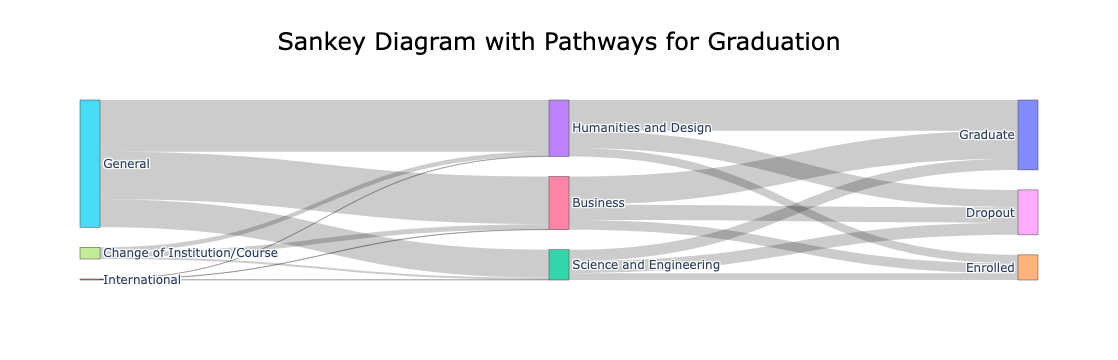

In [34]:
# Implementation


application_modes = df['application_mode'].unique()
courses = df['course'].unique()

outputs = df['output'].unique()




lst_of_cols = ['application_mode', 'course', 'output']

# Creating base figure with all data
    
checkbox_group1 = pn.widgets.CheckBoxGroup(
    name='Mode Checkbox Group', value=list(application_modes), options=list(application_modes),
    inline=False)

checkbox_group2 = pn.widgets.CheckBoxGroup(
    name='Course Checkbox Group', value=list(courses), options=list(courses),
    inline=False)

checkbox_group3 = pn.widgets.CheckBoxGroup(
    name='Output Checkbox Group', value=list(outputs), options=list(outputs),
    inline=False)

# ensuring that at least one value is selected
def enforce_selection(event, checkbox_group):
    if not event.new:
        checkbox_group.value = [event.old[0]]  # Restore the first previously selected value

checkbox_group1.param.watch(lambda event: enforce_selection(event, checkbox_group1), 'value')
checkbox_group2.param.watch(lambda event: enforce_selection(event, checkbox_group2), 'value')
checkbox_group3.param.watch(lambda event: enforce_selection(event, checkbox_group3), 'value')


plot = pn.bind(create_sankey,df,checkbox_group1,checkbox_group2,checkbox_group3,lst_of_cols)
card_width = 320

checkbox_layout = pn.Row(
    pn.Card(
        pn.Column(
            checkbox_group1
        ),
        title="Choose Mode", width=300, collapsed=False
    ),
    pn.Card(
        pn.Column(
            checkbox_group2
        ),
        title="Choose Course", width=300, collapsed=False
    ),
    pn.Card(
        pn.Column(
            checkbox_group3
        ),
        title="Choose Output", width=300, collapsed=False
    ),
)

# main layout 
layout = pn.template.FastListTemplate(
    title="Graduation Pathways",
    theme_toggle=False,
    main=[
        pn.Tabs(
            ("Dashboard", pn.Column(checkbox_layout,plot)),
            active=0  
        )
    ],
    header_background='#a93226'
).servable()

layout.save("sankey.html")